# MSR21 Dataset Analysis

This notebook presents all the values and charts included in the paper submited at MSR21.



In [2]:
import pandas as pd

# loading data (change for positive_data.csv)
df = pd.read_csv('../dataset/positive.csv')

print('total of commits:', len(df))
print('total of projects:', len(df['project'].unique()))
print('total of vulnerabilities:', len(df['cve_id'].drop_duplicates()))
print('total of vulnerability classes (CWE):', len(df['cwe_id'].drop_duplicates()))

languages = set()
for lang in df['lang'].unique():
    if pd.notnull(lang):
        languages = languages | eval(lang)
print('total of languages:', len(languages))


total of commits: 8057
total of projects: 1339
total of vulnerabilities: 5942
total of vulnerability classes (CWE): 146
total of languages: 20


In [2]:
print('total of summaries:', len(df['summary'].unique()))
print('total of message:', len(df['message'].unique()))
count = sum([len(eval(comments)) for comments in df['comments'].unique()])
print('total of comments:', count)

total of summaries: 5853
total of message: 7188
total of comments: 946


In [3]:
for idx, row in df.iterrows():
    df.at[idx, 'year'] = row['date'].split(',')[0].split('/')[2]

print('most recent commit:', max(df['year']))
print('oldest commit:', min(df['year']))

most recent commit: 2021
oldest commit: 1999


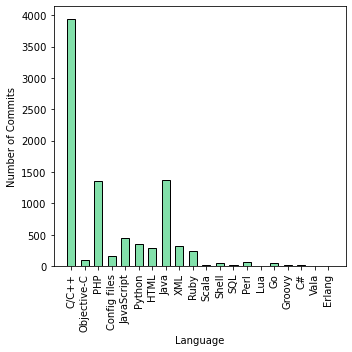

In [5]:
import matplotlib.pyplot as plt

languages = {}
for _, row in df.iterrows():
    if pd.notnull(row['lang']):
        lang_list = eval(row['lang'])
        for lang in lang_list:
            if lang not in languages:
                languages[lang] = 1
            else:
                languages[lang] += 1
                
keys = languages.keys()
values = languages.values()

fig = plt.figure(figsize=(5, 5))
ax = plt.bar(keys, values, color ='#82E0AA',  width = 0.6, edgecolor = "black")
plt.xticks(rotation = 90)
    
plt.xlabel("Language")
plt.ylabel("Number of Commits") 
plt.tight_layout()
plt.savefig('charts/dist_language.pdf')

plt.show()

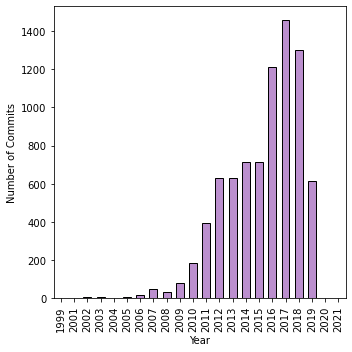

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 5))
df_year_sorted = df['year'].value_counts().sort_index()
ax = df_year_sorted.plot.bar(color ='#BB8FCE',  width = 0.6, edgecolor = "black")

plt.xlabel("Year")
plt.ylabel("Number of Commits") 
plt.tight_layout()
plt.savefig('charts/dist_commits.pdf')

plt.show()

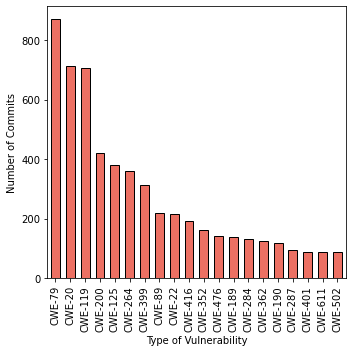

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 5))
df_year_sorted = df['cwe_id'].value_counts()[0:20]
ax = df_year_sorted.plot.bar(color ='#EC7063',  width = 0.6, edgecolor = "black")
    
plt.xlabel("Type of Vulnerability")
plt.ylabel("Number of Commits") 
plt.tight_layout()
plt.savefig('charts/dist_cwe.pdf')

plt.show()

In [8]:
additions, deletions, changes, no_files, logs, readme, test = 0, 0, 0, 0, 0, 0, 0
for files in df['files']:
    files_list = eval(files)
    for file in files_list.keys():
        if 'change' in file.lower() or \
            'news' in file.lower():
            logs+=1
        if 'readme' in file.lower():
            readme+=1
        if 'test' in file.lower():
            test+=1
        additions += files_list[file]['additions']
        deletions += files_list[file]['deletions']
        changes += files_list[file]['changes']
    no_files += len(files_list.keys())

print('files', no_files)
print('changelogs', logs, "({:.2f})%".format(logs/no_files * 100))
print('readme', readme, "({:.2f})%".format(readme/no_files * 100))
print('test', test, "({:.2f})%".format(test/no_files * 100))
print('+++', additions, "({:.2f})%".format(additions/changes * 100))
print('---', deletions, "({:.2f})%".format(deletions/changes * 100))
print('changes', changes)

files 33866
changelogs 933 (2.75)%
readme 131 (0.39)%
test 6770 (19.99)%
+++ 1113450 (74.60)%
--- 379203 (25.40)%
changes 1492653



### Natural Language Analysis

In [9]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [9]:
com_count = 0
for comment in df['comments']:
    comments_list = eval(comment)
    com_count += len(set([comments_list[com_key]['body'] for com_key in comments_list.keys()]))

print('number of comments', com_count)
print('number of summaries', len(df['summary'].unique()))
print('number of messages', len(df['message'].unique()))

1040
5853
7188


In [10]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    plt.show()

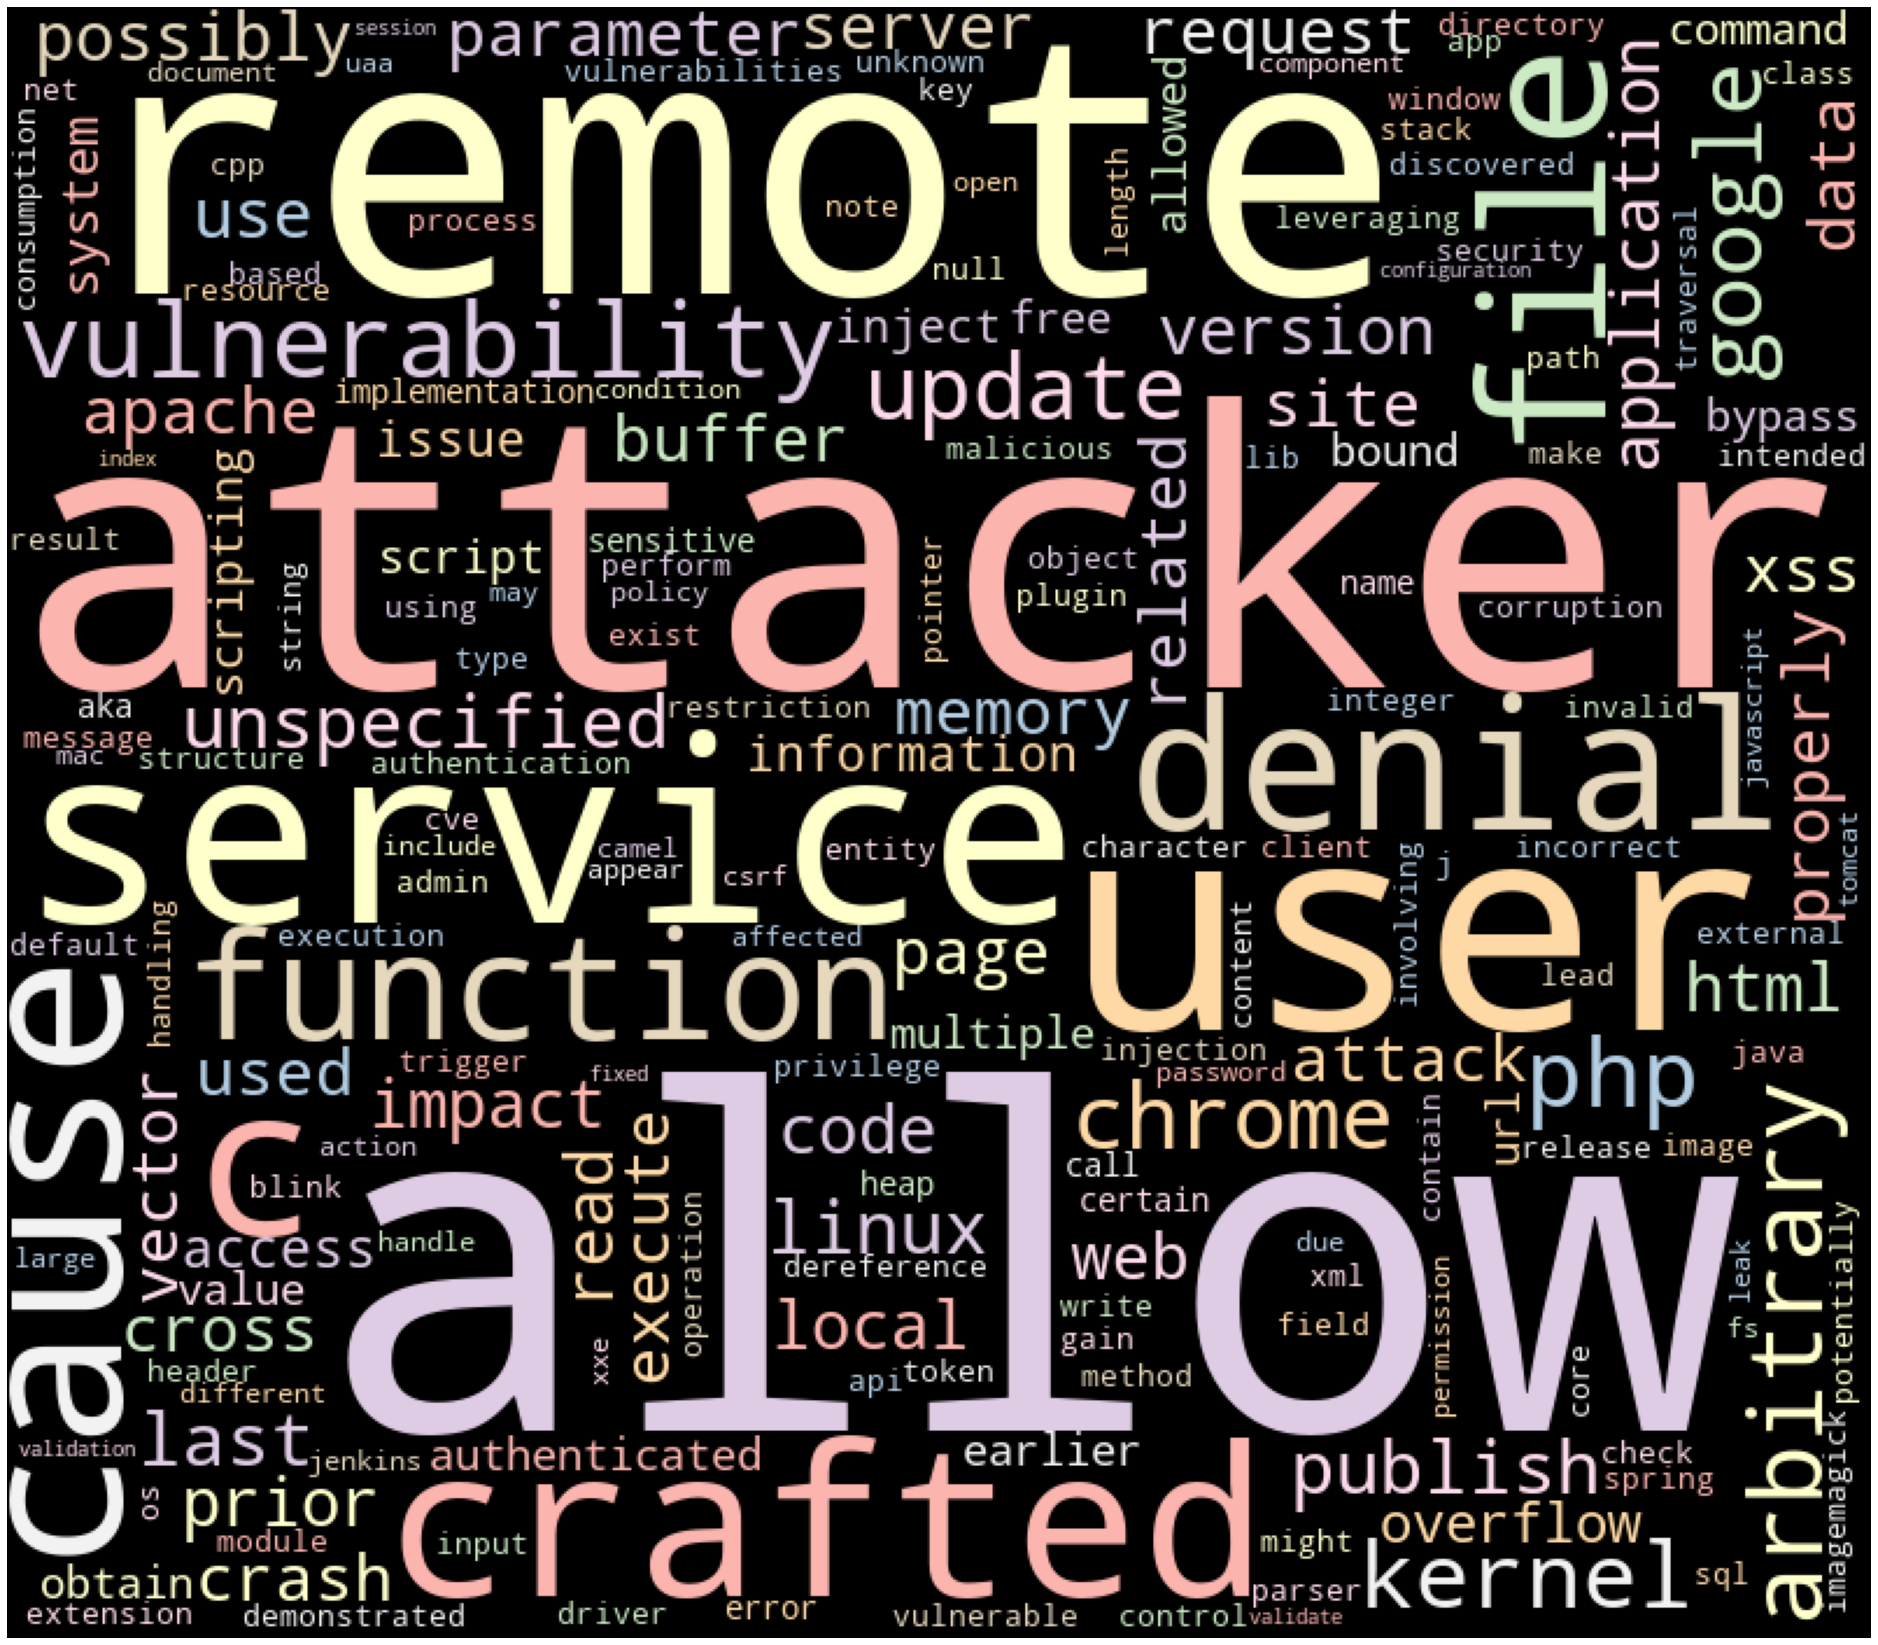

In [11]:
text = " ".join(str(msg).lower() for msg in df['summary'])
stopwords = set(STOPWORDS)
stopwords.update(["https", 'org', 'via', 'x', 'date', 'cr', 'o', 'nan', 'f'])

wordcloud = WordCloud(width =800, height =700, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords=stopwords).generate(text)
plot_cloud(wordcloud)

wordcloud.to_file("charts/wordcloud_summary.png")

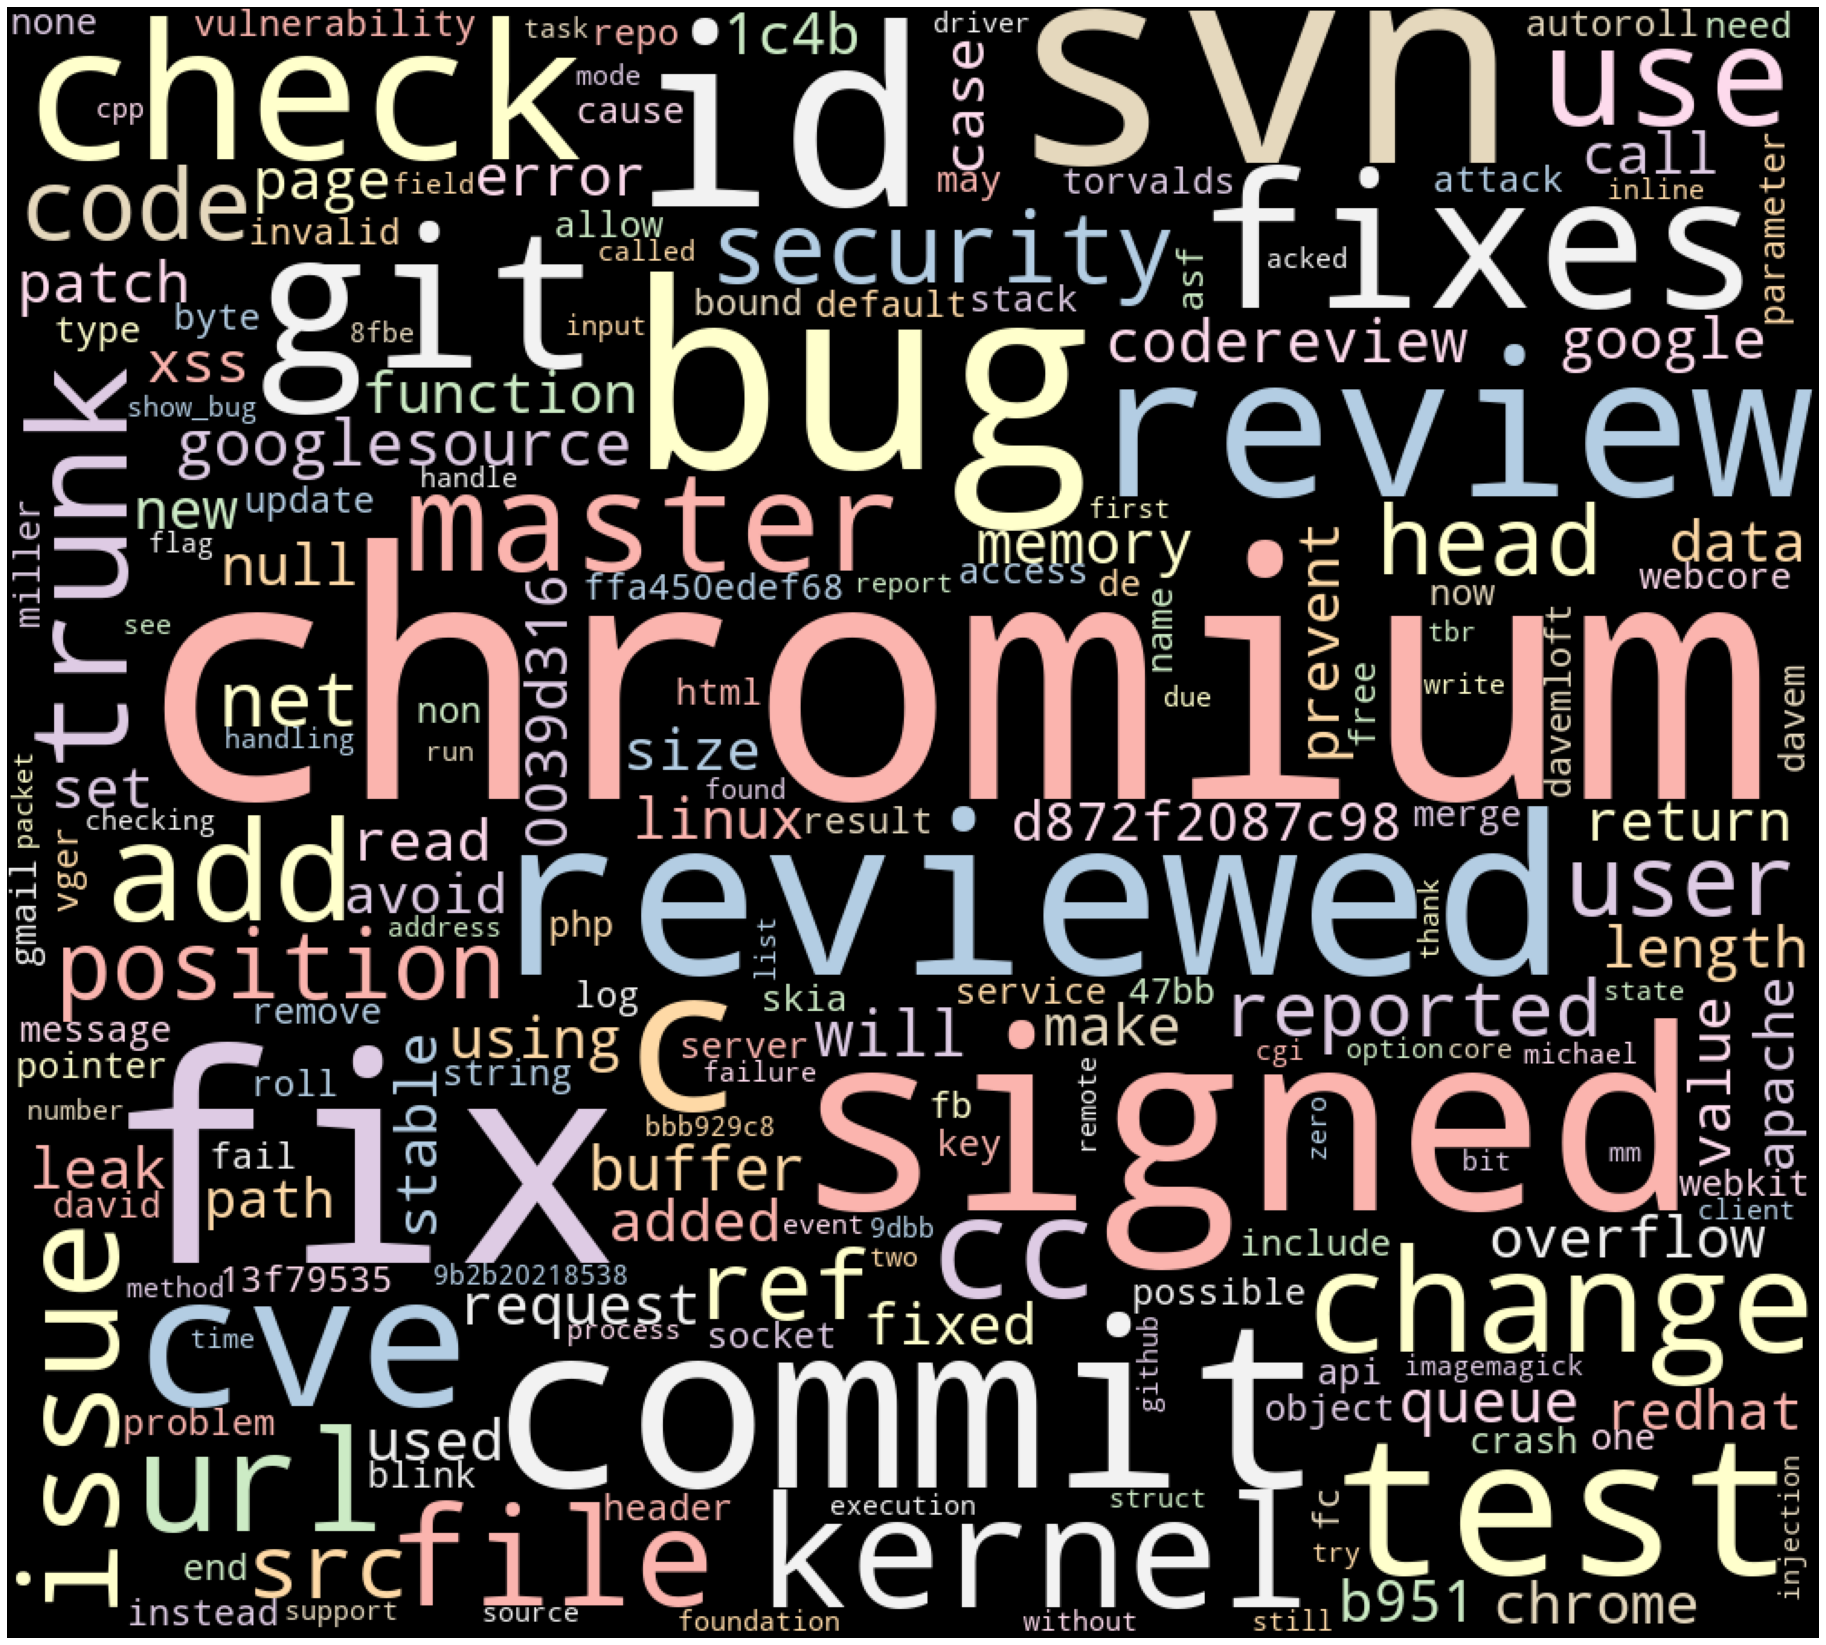

In [12]:
text = " ".join(str(msg).lower() for msg in df['message'])
stopwords = set(STOPWORDS)
stopwords.update(["https", 'org', 'via', 'x', 'date', 'cr', 'j', 'p', 's', 'n', 'h', 'u', 'e'])

wordcloud = WordCloud(width =1000, height =900, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords=stopwords).generate(text)
plot_cloud(wordcloud)

wordcloud.to_file("charts/wordcloud_message.png")

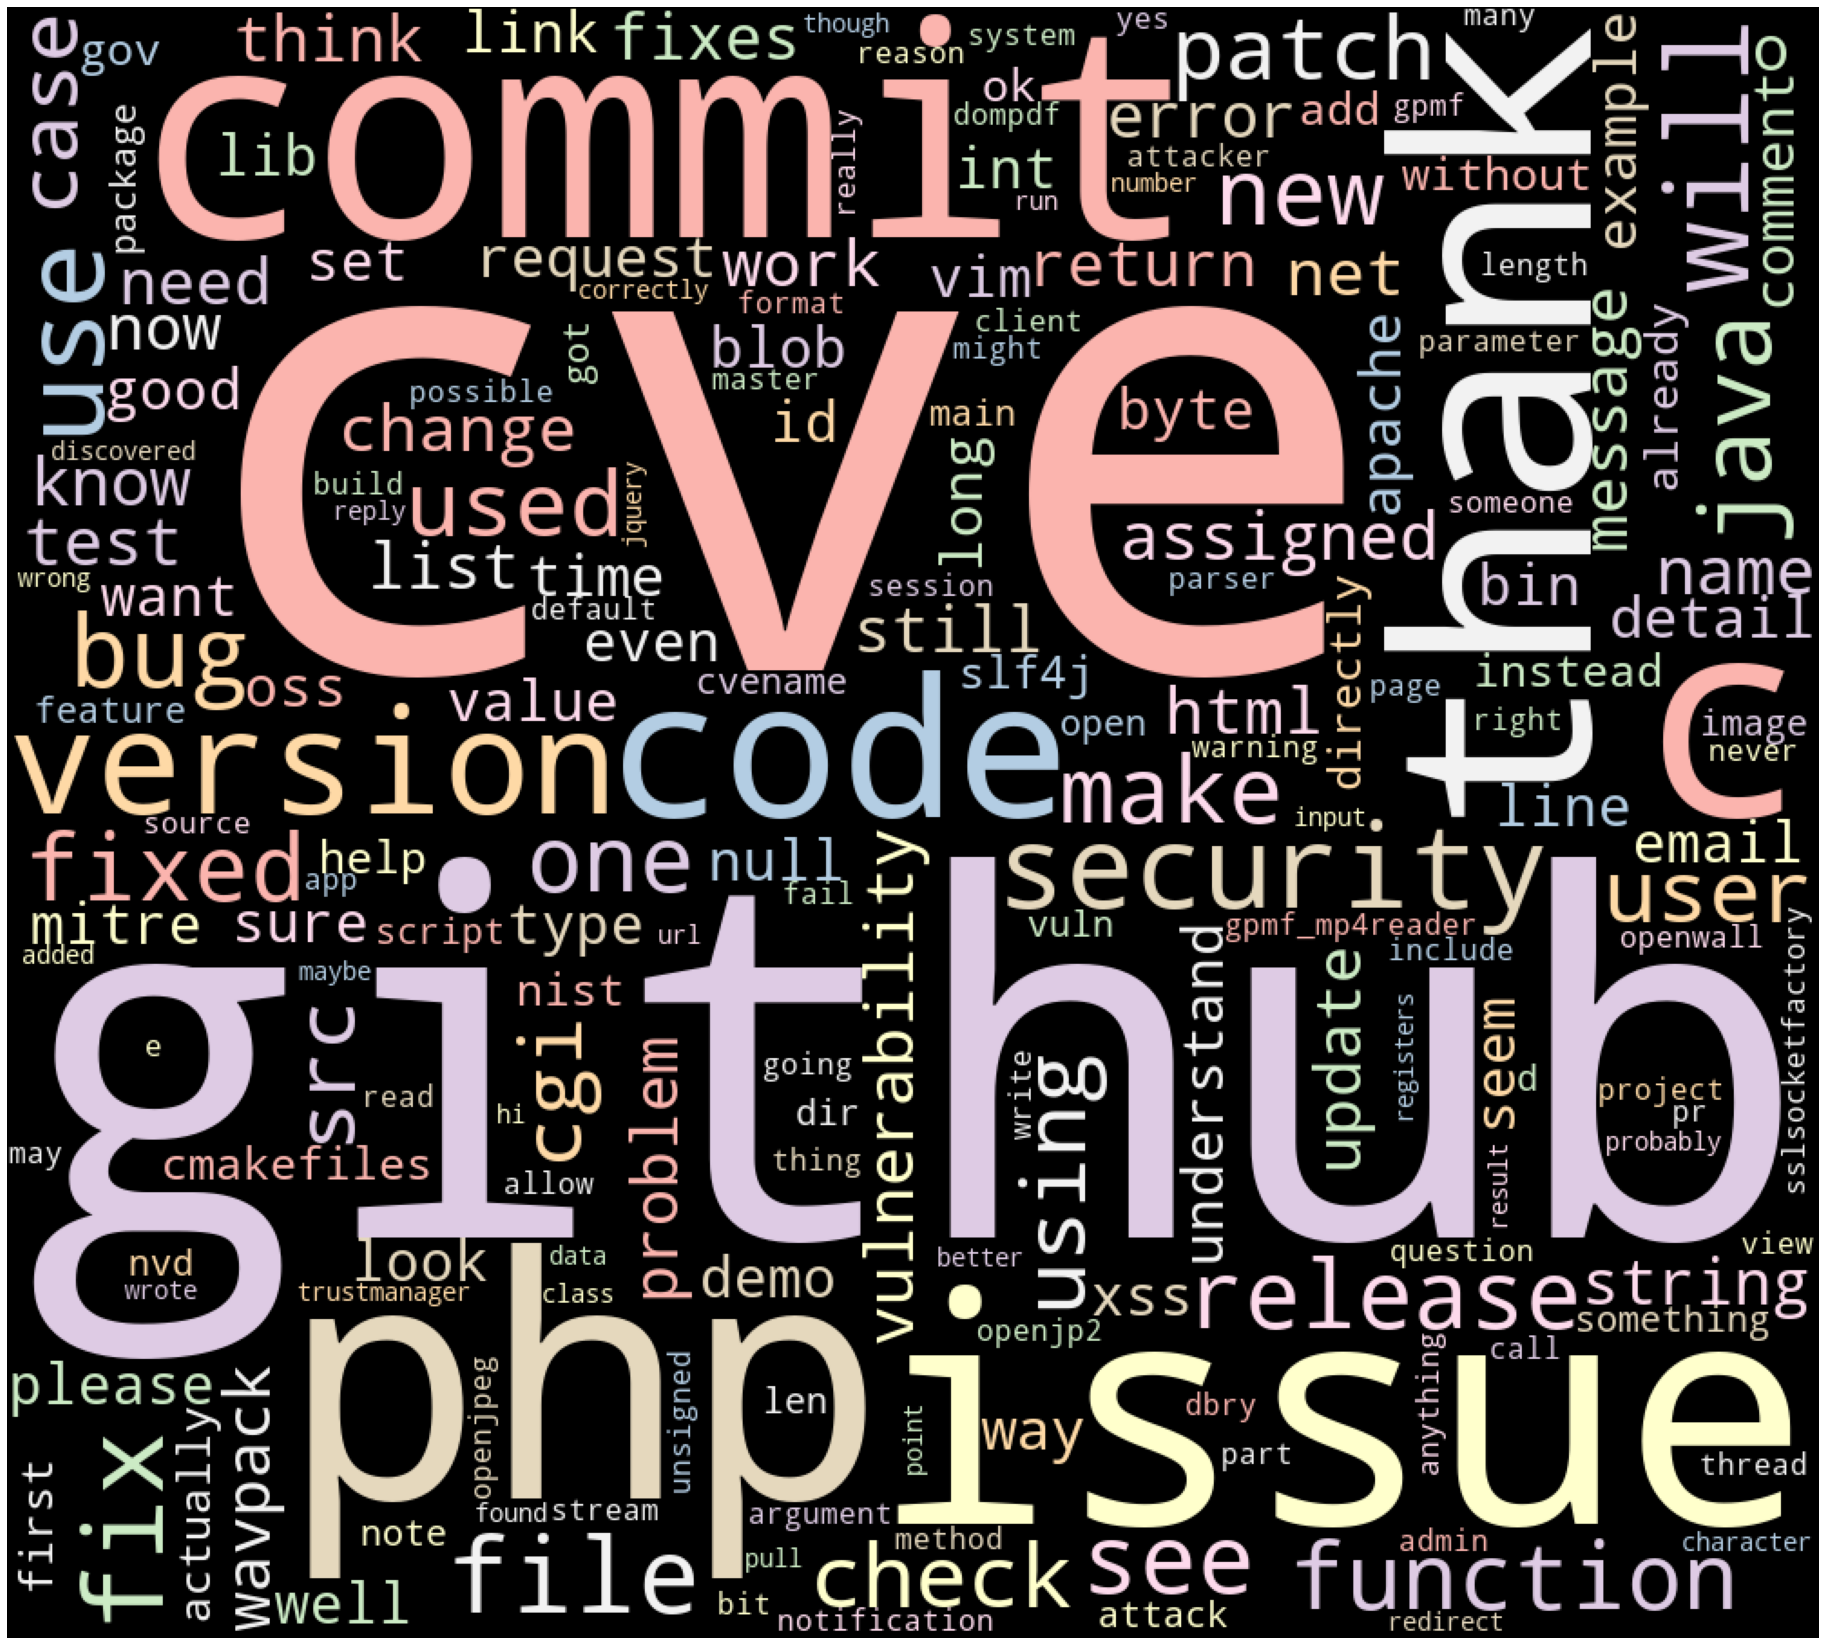

In [13]:
text = ""
for comment in df['comments']:
    comments_list = eval(comment)
    text += " ".join(comments_list[com_key]['body'].lower() for com_key in comments_list.keys())

stopwords = set(STOPWORDS)
stopwords.update(["https", 'org', 'via', 'x', 'date', 'cr', 'j', 'p', 's'])

wordcloud = WordCloud(width =1000, height =900, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords=stopwords).generate(text)
plot_cloud(wordcloud)

wordcloud.to_file("charts/wordcloud_comment.png")